In [1]:
# Load the libraries. 
import warnings
import numpy as np
import pandas as pd
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import Quandl
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
warnings.simplefilter('ignore')
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import urllib2 as url
import subprocess
from statsmodels.graphics.api import abline_plot
import pylab as pl
import json
import os
s = json.load( open(os.getenv('PUI2015')+"/ylai_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_PerCap = pd.read_csv("CountiesPerCapita.csv")
df_Sector =pd.read_csv("CountiesBySector.csv")

In [5]:
df_MSA = pd.read_csv("MSA_County.csv")
df_MSA.dropna(how="all", inplace=True) 

Index([u'fd', u'MSA Name ', u'FIPS', u'COUNTY '], dtype='object')

In [6]:
MSA_County = pd.merge(df_Sector, df_MSA, on='FIPS', how = 'outer')

In [7]:
MSA_County_Merged=pd.read_csv("MSA_County_Merged.csv")
County_Area = pd.read_csv("County_Area.csv")

In [8]:
MSA_County_Area = pd.merge(MSA_County_Merged, County_Area, on='FIPS', how = 'inner')

In [9]:
MSA_group = MSA_County_Area.groupby(' Name ')

In [10]:
#Total Carbon Emission by MSA.
MSA_Total = MSA_group[' Total'].sum() 
MSA_Total.sort(ascending=False)
#Get land area, population and housing units by MSA.
MSA_Area = pd.merge(County_Area,df_MSA, on='FIPS', how = 'outer')
MSA_Area_group = MSA_Area.groupby('MSA Name ')
MSA_Total_Area = MSA_Area_group['Area in square miles - Land area'].sum()
MSA_Total_POP = MSA_Area_group['Population'].sum()/10000000  
MSA_Total_Housing = MSA_Area_group['Housing  units'].sum()/10000000 
MSA_Total_Area.sort(ascending=False)
MSA_Total_POP.sort(ascending=False)
MSA_Total_Housing.sort(ascending=False)

In [46]:
Carb_PerCap = MSA_Total/ MSA_Total_POP
Carb_PerCap.sort(ascending=False)

In [16]:
MSA_Total.to_csv('MSA_Total.csv')
MSA_Total_Area.to_csv('MSA_Total_Area.csv')
MSA_Total_Housing.to_csv('MSA_Total_Housing.csv')

In [19]:
MSA_SUM = pd.read_csv('MSA_Summary.csv')

In [20]:
MSA_SUM['Density']=MSA_SUM['POP']/MSA_SUM['Land_Area']*10000000
MSA_SUM['Carb_PerCap'] = MSA_SUM['Total_Carb']/MSA_SUM['POP']*10000000

In [58]:
MSA_SUM_sort = MSA_SUM.sort(columns=['Total_Carb'], axis=0, ascending=False)
MSA_SUM_10 = MSA_SUM_sort[:100]

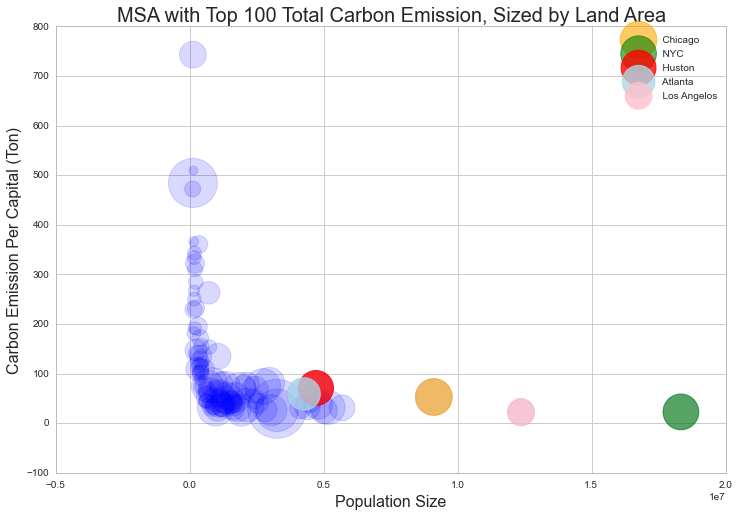

In [77]:
x = MSA_SUM_10['POP']
y = MSA_SUM_10['Carb_PerCap']
x1 = 18323151  #NYC
y1 = 23.414641

x2 = 9098328 #Chicago
y2 = 52.673414

x3 = 4715262 #Huston
y3 = 70.486009

x4 = 12365565 #LA
y4 = 21.547742

x5 = 4248018 #Atlanta
y5 = 57.970564

labels = MSA_SUM_10
plt.figure(figsize=(12, 8))
plt.xlabel('Population Size', fontsize = 16)
plt.ylabel('Carbon Emission Per Capital (Ton)', fontsize = 16)
s = [MSA_SUM_10['Land_Area']*500]

s1 = 2.5449*500
s2 = 2.688646*500
s3 = 2.434218*500
s4 = 1.442298 *500
s5 = 2.136124 *500

plt.scatter(x,y,s=s, color = 'blue', alpha = 0.15)
plt.scatter(x2,y2, s=s2, color = 'Orange', alpha = .6, label = '  Chicago')
plt.scatter(x1,y1, s=s1, color = 'Green', alpha = .6, label = '  NYC')
plt.scatter(x3,y3, s=s3, color = 'red', alpha = .8, label = '  Huston')
plt.scatter(x5,y5, s=s5, color = 'lightblue', alpha = .8, label = '  Atlanta')
plt.scatter(x4,y4, s=s4, color = 'pink', alpha = .8, label = '  Los Angelos')


plt.title('MSA with Top 100 Total Carbon Emission, Sized by Land Area', fontsize = 20)
plt.legend()
plt.show()

In [72]:
print MSA_SUM_10[:10]

                                                  MSA       POP  Total_Carb  \
64           Chicago-Naperville-Joliet, IL-IN-WI MSA    9098328      47.924   
233             New York-Newark-Edison, NY-NJ-PA MSA   18323151      42.903   
149               Houston-Baytown-Sugar Land, TX MSA    4715262      33.236   
198         Los Angeles-Long Beach-Santa Ana, CA MSA   12365565      26.645   
18            Atlanta-Sandy Springs-Marietta, GA MSA    4248018      24.626   
215      Minneapolis-St. Paul-Bloomington, MN-WI MSA    2968785      24.212   
92                    Detroit-Warren-Livonia, MI MSA    4452565      20.548   
317                             St. Louis, MO-IL MSA    2721447      20.088   
27                               Baton Rouge, LA MSA     705886      18.547   
253  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    5686865      17.530   

     Commercial  Industrial  Residential  Electricity_Prod  Onroad  Cement  \
64        2.709      11.512        5.336            